In [7]:
%%capture
# Import libraries
import sys
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Define a useful function for pull stuff out of dicts
getparam = lambda keylabel, pdict, default: pdict[keylabel] if keylabel in pdict else default

In [38]:
# All cases
allcases = [['Nalu-Wind baseline', 'NaluRuns/192cubed/baseline/ke_time.dat',        {'tcol':2, 'kecol':0, 'color':'b'}],
            ['Nalu-Wind smag',     'NaluRuns/192cubed/smag/ke_time.dat',            {'tcol':2, 'kecol':0, 'color':'b', 'ls':'--'}],
            #['Nalu-Wind upw=0.1',  'NaluRuns/192cubed/upwind_0100/ke_time.dat',     {'tcol':2, 'kecol':0, 'color':'b', 'ls':'-.'}],
            ['Nalu-Wind upw=0.2',  'NaluRuns/192cubed/upwind_0200/ke_time.dat',     {'tcol':2, 'kecol':0, 'color':'b', 'ls':':'}],
            #['Nalu-Wind upw=0.3',  'NaluRuns/192cubed/upwind_0300/ke_time.dat',     {'tcol':2, 'kecol':0, 'color':'b', 'ls':'-.'}],
            
            ['AMR-Wind baseline',  'AMRRuns/AMR_tke.dat',                           {'tcol':0, 'kecol':1, 'color':'r'}],
            ['AMR-Wind smag',      'AMRRuns/AMR_tke.dat',                           {'tcol':0, 'kecol':3, 'color':'r', 'ls':'--'}],
            ['AMR-Wind nolim',     'AMRRuns/nolim/AMR_KE.dat',                      {'tcol':0, 'kecol':1, 'color':'r', 'ls':'-.'}],
            ['DNS',                'DNS/C3.3_datafiles/spectral_Re1600_512.gdiag',  {'tcol':0, 'kecol':1, 'color':'k'}],
           ]

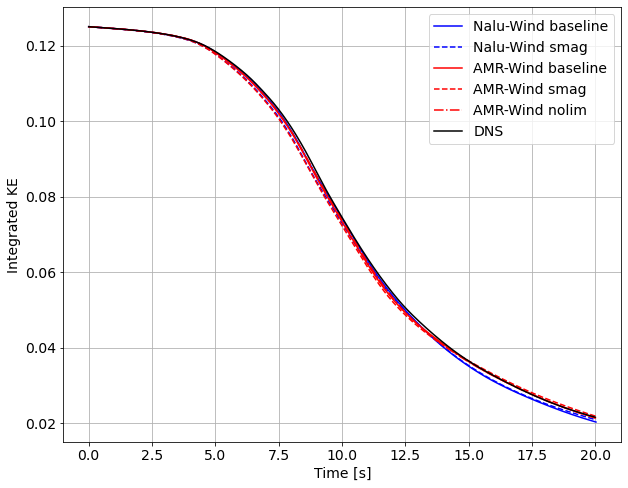

In [39]:
# Plot the kinetic energy vs time
plt.figure(figsize=(10,8));
plt.rc('font', size=14)

for case in allcases:
    label  = case[0]
    kefile = case[1]
    d      = case[2]
    tcol   = getparam('tcol',  d, 0)
    kecol  = getparam('kecol', d, 1)
    color  = getparam('color', d, 'g')
    ls     = getparam('ls',    d, '-')
    dat    = np.loadtxt(kefile)
    plt.plot(dat[:,tcol], dat[:,kecol], color=color, ls=ls, label=label)

plt.xlabel('Time [s]')
plt.ylabel('Integrated KE')
plt.grid()
plt.legend()

## DNS voriticity plot

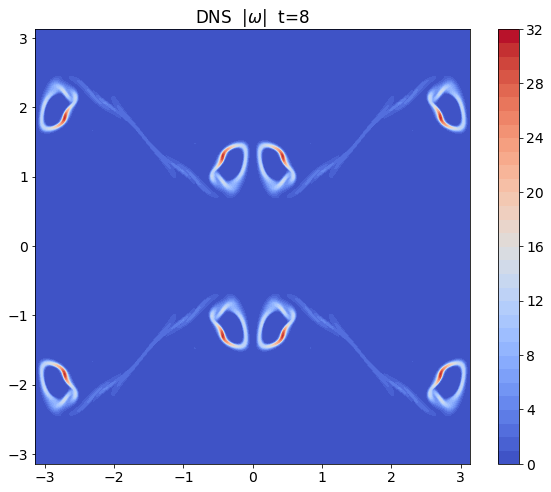

In [70]:
from numpy import *

#import pylab as p
from struct import *

Pi = arccos(-1)
x = arange(-Pi,Pi-2.*Pi/512.,2.*Pi/512.)
y = arange(-Pi,Pi-2.*Pi/512.,2.*Pi/512.)

size = (len(x),len(y))

w = zeros(size)

file = open('DNS/C3.3_datafiles/wn_slice_x0_08000.out', 'rb')
data = file.read()

n = 0
for i in range(len(x)):
  for j in range(len(y)):
    a = unpack('d', data[n:n+8])
    w[j][i] = a[0]
    n = n+8

#fig=p.figure()
##p.contour(x,y,w, levels = [1,5,10,20,30])
#p.contourf(x,y,w)#, levels = [1,5,10,20,30])
#p.xlim([-pi, pi])
#p.ylim([-pi, pi])
##print(max(x))
##p.axis('normal')
#p.colorbar()
#p.show()

plt.figure(figsize=(10,8));
plt.rc('font', size=14)
plt.contourf(x,y,w, levels=linspace(0,32,33),cmap=plt.get_cmap('coolwarm'))#, levels = [1,5,10,20,30])
plt.xlim([-pi, pi])
plt.ylim([-pi, pi])
plt.title('DNS  |$\omega$|  t=8')
plt.axis('square')
plt.colorbar()
